<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Shallow_neural_network_with_Keras_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a moons classification problem- Shallow neural network with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# 1. Create an artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 7
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [0]:
X,y = make_moons(n_samples = 6000, noise = 0.08)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6000, 2)
(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.3 Data visualization

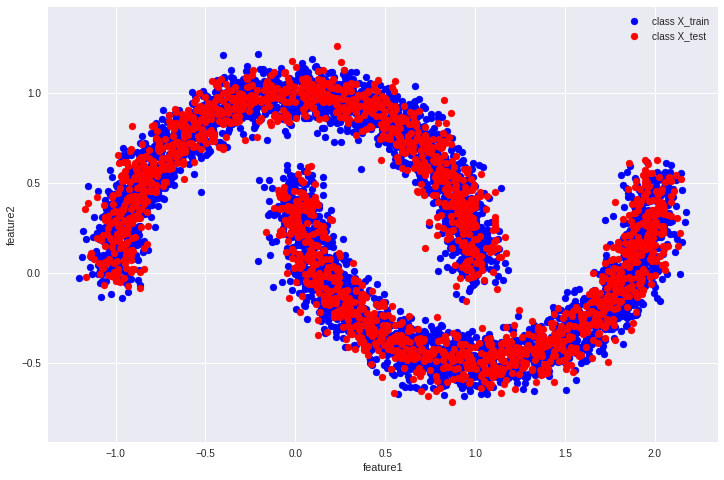

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

### 1.4 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(4020, 2)
y_train:	(4020,)
x_test:		(1980, 2)
y_test:		(1980,)


# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

### 2.2 Creating a model

Our model will have 3 layers, with 6 neurons in the input layer, 6 in the hidden layer and one neuron in the output layer.
We will use normal initializer that generates tensors with a normal distribution.

The optimizer we'll use is Adam .It is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data. Adam is a popular algorithm in the field of deep learning because it achieves good results fast. Default parameters follow those provided in the original paper. 

To make this work in keras we need to compile a model. An important choice to make is the loss function. We use the binary_crossentropy loss and not the usual in multi-class classification used categorical_crossentropy loss. This might seem unreasonable, but we want to penalize each output node independantly. So we pick a binary loss and model the output of the network as a independent bernoulli distributions per label.

In [0]:
# create a model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile a model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

### 2.4 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)
print("Prediction values shape:", prediction_values.shape)

Prediction values shape: (1980, 1)


### 2.5 Accuracy

In [0]:
print(np.mean(results.history["val_acc"]))

0.992525252708883


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
4020/4020 [==============================] - 0s 17us/step
loss=0.0000, accuracy: 100.0000%
Evaluating on testing set...
1980/1980 [==============================] - 0s 17us/step
loss=0.0000, accuracy: 100.0000%


### 2.7 Summarize history for accuracy

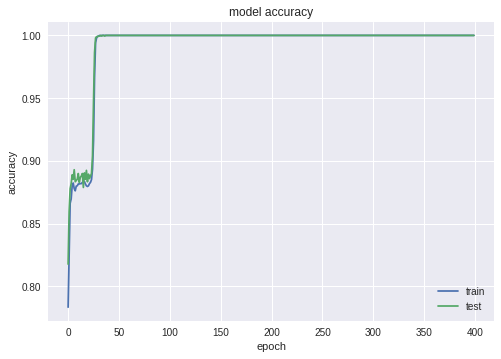

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 0.5934

Minimum Loss : 0.0000

Loss difference : 0.5934


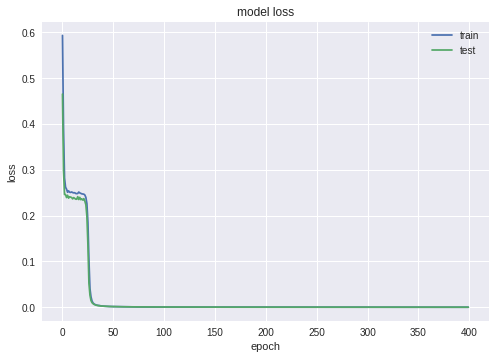

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

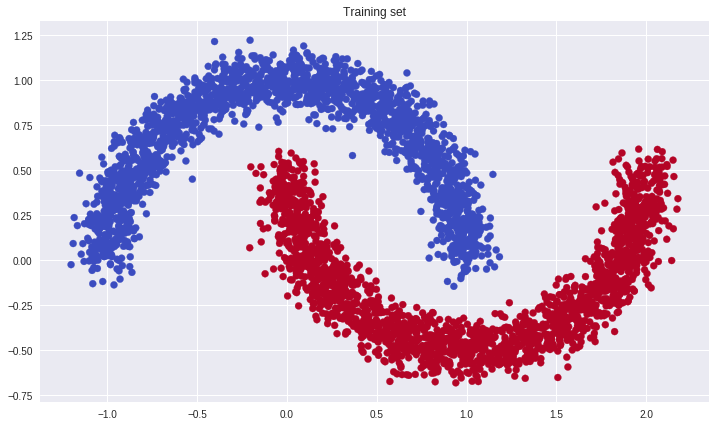

In [0]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

### 3.2 Visualization of the model predictions on our test set

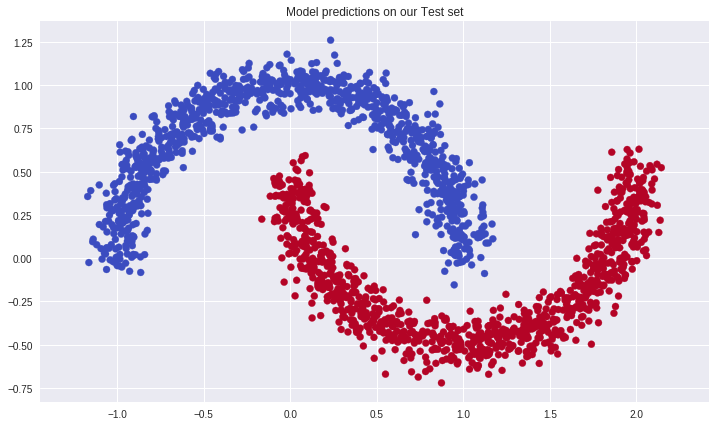

In [0]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

We can now see how our model separates the classes.

Text(0.5, 1.0, 'Model predictions on our Test set')

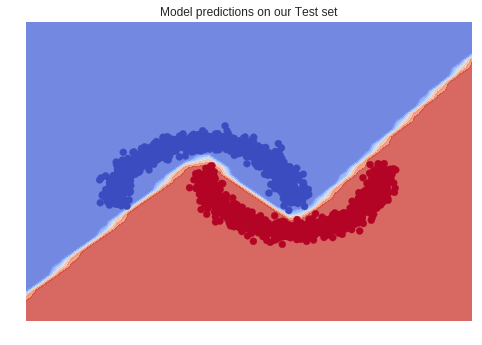

In [0]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')


### 3.3 Display the weights and biases of our model

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 4) :
 [[-0.9445679   3.8907194  -0.51399803  0.8384219 ]
 [ 0.68285245  1.6877601   0.26344177 -0.8853263 ]]
Input layer biases (4,) :
 [ 0.978776   -2.2399297  -0.19219165  0.90070635]

Hidden layer weights (4, 6) :
 [[-2.0996964   2.0053818   2.149236   -1.5277758   1.8692904   4.888615  ]
 [-3.0776281   2.1404927  -0.5627957  -2.0021093   1.1997503   5.2312794 ]
 [-1.9590071   1.8382142   4.472641   -2.1134436   0.62665004  3.5781193 ]
 [ 1.9349368   0.12336348 -7.4610357   1.8382963  -0.13667977 -1.0371922 ]]
Hidden layer biases (6,) :
 [ 0.96516776  0.24500266 -0.00454941  0.972027    0.5021188   0.766234  ]

Output layer weights (6, 1) :
 [[ 2.8872004]
 [-1.3781867]
 [-5.062055 ]
 [ 1.9805259]
 [-1.3070586]
 [-5.9068704]]
Output layer biases (1,) :
 [-0.44705853]


### 3.4 Activation functions

The advantage of **tanh** is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

**ReLu** - Rectified Linear unit is the default choice of activation functions in the hidden layer. In the output layer, we use **Sigmoid** as activation function, because its output is in the range between 0 and 1.

By using ReLu in the hidden layer, the Neural Network will learn much faster then using sigmoid or tanah, because the slope of sigmoid and tanh is going to be 0 if z is large positive or negative number and it slow down gradient descent. The derivative of ReLu is 1 if z>0.

First we should define them:

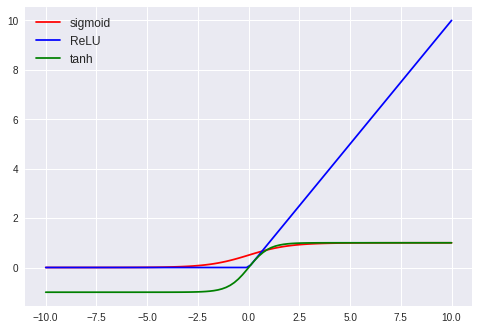

In [0]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
def tanh(z):
    return np.tanh(z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.plot(z, tanh(z),'g',label ='tanh')
plt.legend(fontsize=12)

### 3.5 Compute the output of each neuron in our network

Compute the output of each neuron in our network, step by step.

For more about neural networks, you can visit http://datahacker.rs/neural_networks_representation/.

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))
out22 = np.zeros((50*50, 1))
out23 = np.zeros((50*50, 1))
out24 = np.zeros((50*50, 1))
out25 = np.zeros((50*50, 1))
out26 = np.zeros((50*50, 1))

out31  = np.zeros((50*50, 1))

for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = tanh(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = tanh(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = tanh(n13)

    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = tanh(n14)
  
    # Hidden layer
    n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + biases1[0]
    a21 = ReLU(n21)

    n22 = a11 * weights1[0][1] + a12 * weights1[1][1] + a13 * weights1[2][1] + a14 * weights1[3][1] + biases1[1]
    a22 = ReLU(n22)
    
    n23 = a11 * weights1[0][2] + a12 * weights1[1][2] + a13 * weights1[2][2] + a14 * weights1[3][2] + biases1[2]
    a23 = ReLU(n23)
    
    n24 = a11 * weights1[0][3] + a12 * weights1[1][3] + a13 * weights1[2][3] + a14 * weights1[3][3] + biases1[3]
    a24 = ReLU(n24)
    
    n25 = a11 * weights1[0][4] + a12 * weights1[1][4] + a13 * weights1[2][4] + a14 * weights1[3][4] + biases1[4]
    a25 = ReLU(n25)
    
    n26 = a11 * weights1[0][5] + a12 * weights1[1][5] + a13 * weights1[2][5] + a14 * weights1[3][5] + biases1[5]
    a26 = ReLU(n26)

    # Output layer
    
    n31 = a21 * weights2[0][0] + a22 * weights2[1][0] \
        + a23 * weights2[2][0] + a24 * weights2[3][0] \
        + a25 * weights2[4][0] + a26 * weights2[5][0] \
        + biases2[0]
    a31 = sigmoid(n31)
    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a11
    out12[i*50+j] = a12
    out13[i*50+j] = a13
    out14[i*50+j] = a14
    
    out21[i*50+j] = a21
    out22[i*50+j] = a22
    out23[i*50+j] = a23
    out24[i*50+j] = a24
    out25[i*50+j] = a25
    out26[i*50+j] = a26
    
    out31[i*50+j] = a31

### 3.6 Plot the output of each neuron in the input layer

Now we can plot the output of each neuron in the input layer

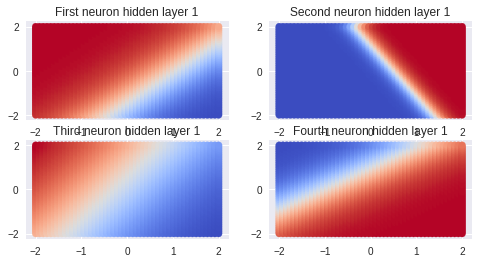

In [0]:
plt.figure(figsize =(8,4))

# First neuron, input layer
plt.subplot(221)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(222)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(223)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(224)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

### 3.7 Plot the output of each neuron in the hidden layer

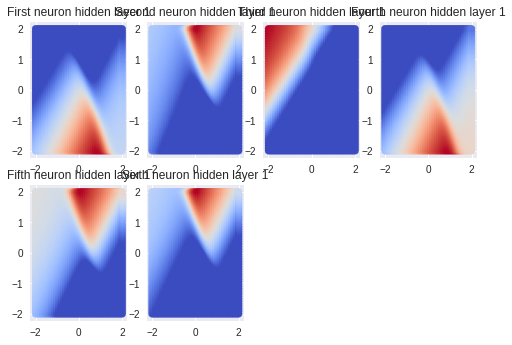

In [0]:
# First neuron, hidden layer
plt.subplot(241)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# Second neuron, hidden layer
plt.subplot(242)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out22.reshape(-1), cmap=cm.coolwarm)

# Third neuron, hidden layer
plt.subplot(243)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out23.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, hidden layer
plt.subplot(244)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out24.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, hidden layer
plt.subplot(245)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out25.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, hidden layer
plt.subplot(246)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out26.reshape(-1), cmap=cm.coolwarm)

### 3.8 Output layer

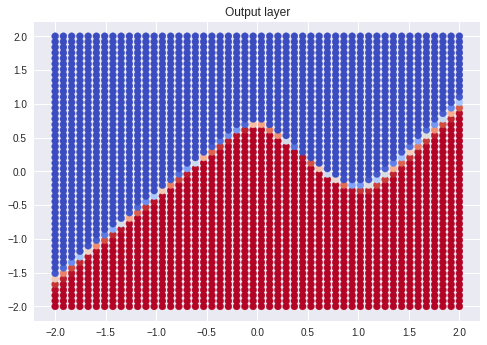

In [0]:
# Output layer
plt.title('Output layer')
plt.scatter(result[:, 0], result[:, 1], c= out31.reshape(-1), cmap=cm.coolwarm)

# 4. 3D visualization

### 4.1 3D visualization of our neural network input layer

Text(0.5, 0.92, '3D visualization of our neural network first layer fourth neuron')

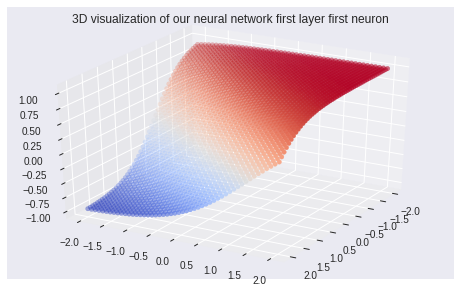

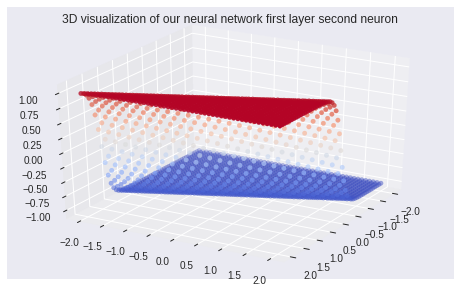

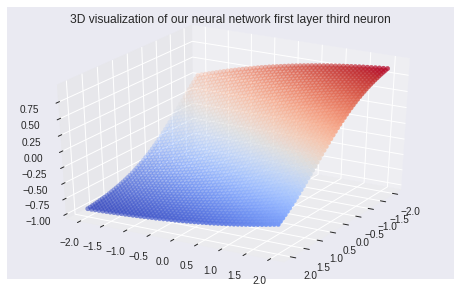

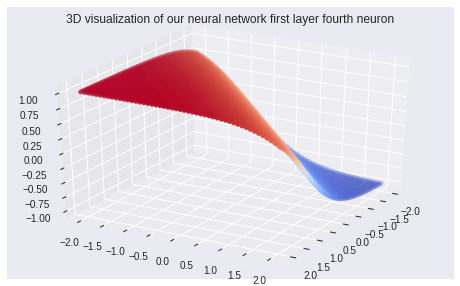

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

### 4.2 3D visualization of our neural network hidden layer

Text(0.5, 0.92, '3D visualization of our neural network second layer sixht neuron')

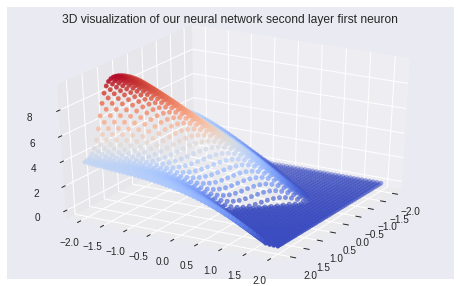

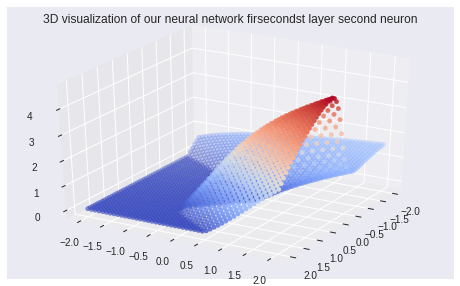

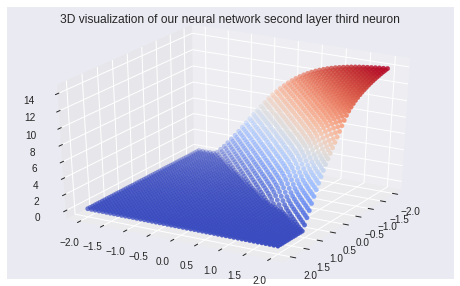

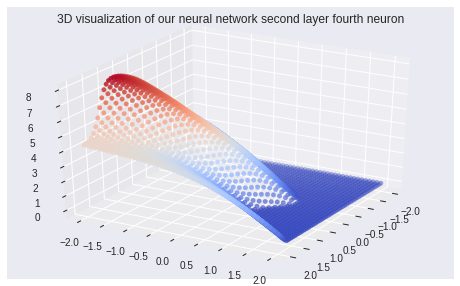

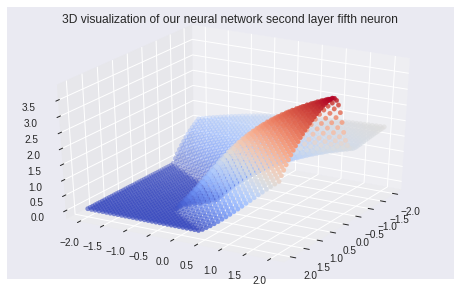

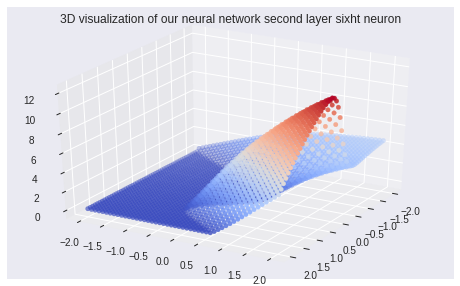

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out22.reshape(-1), c=out22.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network firsecondst layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out23.reshape(-1), c=out23.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out24.reshape(-1), c=out24.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out25.reshape(-1), c=out25.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out26.reshape(-1), c=out26.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer sixht neuron')


### 4.3 3D visualization of our neural network output layer

Text(0.5, 0.92, '3D visualization of our neural network output layer')

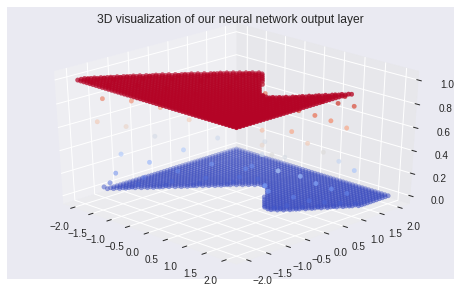

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out31.reshape(-1), c=out31.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer')

For more informations, visit http://datahacker.rs/ .

For more examples, visit https://github.com/DavorJordacevic.